### Práctica de solicitud de datos:

In [37]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
url = 'https://www.trendingpc.es/pc-gaming/filtro/serie_graficas/geforce-rtx-3050'
request_url = requests.get(url)
request_url.status_code

200

In [4]:
html_text_cg = BeautifulSoup(request_url.text, 'html')
products = html_text_cg.find_all('strong', class_='product name product-item-name')
prices = html_text_cg.find_all('span', class_='price')


In [5]:

products_price = []
products_name = []

for price in prices:
    signal = price.text
    result = float(signal.replace('€', '').replace(',', '.').strip())
    products_price.append(result)

for song in products:
    products_name.append(song.text)

dicc_song = {'name': products_name,
             'price': products_price}

df = pd.DataFrame(dicc_song)
df

,name,price
0,PC Gaming Intel Core I5 12400F - NVIDIA RTX 30...,759.0
1,PC Gaming Intel Core I5 14400F - RTX 3050 6gb ...,859.0
2,Pack Gaming - Intel Core I5 14400F - RTX 3050 ...,969.0
3,PC Gaming AMD RYZEN 5 8400F - RTX 3050 6gb - O...,839.0


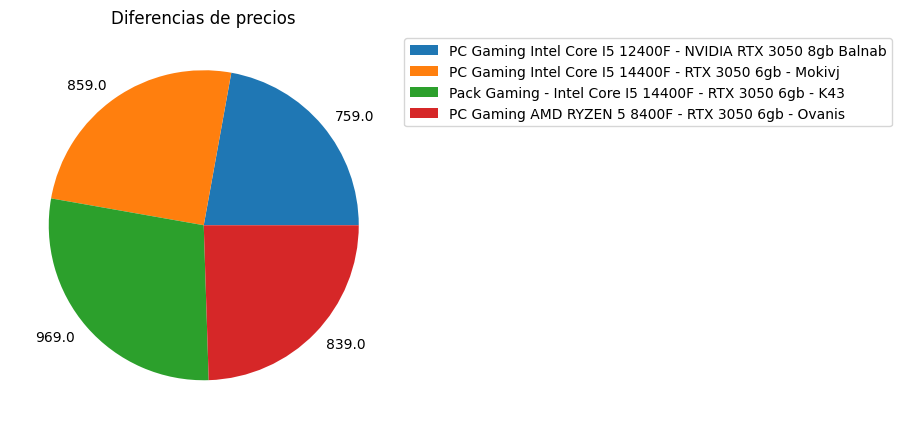

In [ ]:
plt.figure(figsize=(5,10))
plt.pie(df['price'],labels=df['price'], colors=None)
plt.legend(df['name'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Diferencias de precios')
plt.show()

In [ ]:
datos = sqlite3.connect("precios.gamingdf")
df.to_sql("tablaprecios", datos, if_exists="replace", index=False)
cur = datos.cursor()
cur.execute('SELECT * FROM tablaprecios')
#Dice que mi database esta cerrada pero no encuentro el error 

DatabaseError: Execution failed on sql 'DROP TABLE "tablaprecios"': database is locked